# Code for the initial run #

**Instalation of the packages**

In [ ]:
pip install "devicely"
pip install "jointly"

**Import necessary packages**

In [3]:
import devicely
import jointly
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Read Empatica data ##

In [4]:
empatica_reader_sub1 = devicely.EmpaticaReader(r'C:\Users\juank\OneDrive\Desktop\hype-de-full\2019\1\Empatica') #read the Empatica data from subject 1

In [5]:
empatica_reader_sub1.data.head() #check the head of the whole dataset

,bvp,eda,hr,temp,acc_x,acc_y,acc_z,acc_mag,timedelta,ibi
2019-06-15 11:45:17.000000,-0.0,0.0,NaN,26.33,-1.0,64.0,2.0,64.039051,NaN,NaN
2019-06-15 11:45:17.015625,-0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-06-15 11:45:17.031250,-0.0,NaN,NaN,NaN,-1.0,64.0,2.0,64.039051,NaN,NaN
2019-06-15 11:45:17.046875,-0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-06-15 11:45:17.062500,-0.0,NaN,NaN,NaN,-1.0,64.0,2.0,64.039051,NaN,NaN


In [5]:
empatica_reader_sub1.IBI.head() #check the head of Empatica's IBI

,timedelta,ibi
2019-06-15 11:45:31.110021,14.110021,0.578151
2019-06-15 11:46:16.174584,59.174584,0.625029
2019-06-15 11:46:16.768361,59.768361,0.593777
2019-06-15 11:46:17.440267,60.440267,0.671906
2019-06-15 11:46:17.987167,60.987167,0.546900


**Create a subset to test with the end of the pipeline (EMPATICA)**

In [6]:
empatica_test = empatica_reader_sub1  # copy the data into a working subset

In [7]:
empatica_test.data.head()  #check and match the head of the data

,bvp,eda,hr,temp,acc_x,acc_y,acc_z,acc_mag,timedelta,ibi
2019-06-15 11:45:17.000000,-0.0,0.0,NaN,26.33,-1.0,64.0,2.0,64.039051,NaN,NaN
2019-06-15 11:45:17.015625,-0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-06-15 11:45:17.031250,-0.0,NaN,NaN,NaN,-1.0,64.0,2.0,64.039051,NaN,NaN
2019-06-15 11:45:17.046875,-0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-06-15 11:45:17.062500,-0.0,NaN,NaN,NaN,-1.0,64.0,2.0,64.039051,NaN,NaN


In [8]:
empatica_test = empatica_test.data.reset_index() # delete the multiIndex

In [9]:
empatica_test.head()

,index,bvp,eda,hr,temp,acc_x,acc_y,acc_z,acc_mag,timedelta,ibi
0,2019-06-15 11:45:17.000000,-0.0,0.0,NaN,26.33,-1.0,64.0,2.0,64.039051,NaN,NaN
1,2019-06-15 11:45:17.015625,-0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-06-15 11:45:17.031250,-0.0,NaN,NaN,NaN,-1.0,64.0,2.0,64.039051,NaN,NaN
3,2019-06-15 11:45:17.046875,-0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-06-15 11:45:17.062500,-0.0,NaN,NaN,NaN,-1.0,64.0,2.0,64.039051,NaN,NaN


In [10]:
 #delete the unnecessary columns
empatica_test = empatica_test.drop(columns = ["bvp", "eda", "hr", "temp", "acc_x", "acc_y", "acc_z", "acc_mag", "timedelta"])

In [11]:
empatica_test #check the data

,index,ibi
0,2019-06-15 11:45:17.000000,NaN
1,2019-06-15 11:45:17.015625,NaN
2,2019-06-15 11:45:17.031250,NaN
3,2019-06-15 11:45:17.046875,NaN
4,2019-06-15 11:45:17.062500,NaN
...,...,...
127103,2019-06-15 12:18:02.828125,NaN
127104,2019-06-15 12:18:02.843750,NaN
127105,2019-06-15 12:18:02.859375,NaN
127106,2019-06-15 12:18:02.875000,NaN


In [12]:
empatica_test = empatica_test.loc[empatica_test["ibi"].isnull() != True] # drop all the NaN rows

In [13]:
 #drop the values of RR = 0 (an interval between to subsequents RR can not be 0)
empatica_test = empatica_test.drop(empatica_test[empatica_test.ibi == 0.0].index)

In [14]:
 #save the working subset
empatica_test.to_csv(r'C:\Users\juank\OneDrive\Desktop\Master_code\Sub1\empatica_test.csv', date_format = "%Y-%m-%d %H:%M:%S.%f", index=False)

## Read Faros data ##

In [6]:
faros_reader_sub1 = devicely.FarosReader(r"C:\Users\juank\OneDrive\Desktop\hype-de-full\2019\1\Faros\faros.CSV") #read the Faros data from subject 1

In [7]:
faros_reader_sub1.data.head() #check the head of the whole dataset

,ECG,Accelerometer_X,Accelerometer_Y,Accelerometer_Z,Marker,HRV,acc_mag
time,,,,,,,
2019-06-15 13:51:03.000,4.0,35.0,-12.0,-1008.0,0.0,0.0,1008.678839
2019-06-15 13:51:03.001,5.0,NaN,NaN,NaN,NaN,NaN,NaN
2019-06-15 13:51:03.002,-7.0,NaN,NaN,NaN,NaN,NaN,NaN
2019-06-15 13:51:03.003,-74.0,NaN,NaN,NaN,NaN,NaN,NaN
2019-06-15 13:51:03.004,15.0,NaN,NaN,NaN,NaN,NaN,NaN


**Create a subset to test with the end of the pipeline (FAROS)**

In [17]:
faros_test = faros_reader_sub1 # copy the data into a working subset

In [18]:
faros_test.data.head() #check and match the head of the data

,ECG,Accelerometer_X,Accelerometer_Y,Accelerometer_Z,Marker,HRV,acc_mag
time,,,,,,,
2019-06-15 13:51:03.000,4.0,35.0,-12.0,-1008.0,0.0,0.0,1008.678839
2019-06-15 13:51:03.001,5.0,NaN,NaN,NaN,NaN,NaN,NaN
2019-06-15 13:51:03.002,-7.0,NaN,NaN,NaN,NaN,NaN,NaN
2019-06-15 13:51:03.003,-74.0,NaN,NaN,NaN,NaN,NaN,NaN
2019-06-15 13:51:03.004,15.0,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
faros_test = faros_test.data.reset_index() # delete the multiIndex

In [20]:
faros_test.head()

,time,ECG,Accelerometer_X,Accelerometer_Y,Accelerometer_Z,Marker,HRV,acc_mag
0,2019-06-15 13:51:03.000,4.0,35.0,-12.0,-1008.0,0.0,0.0,1008.678839
1,2019-06-15 13:51:03.001,5.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-06-15 13:51:03.002,-7.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-06-15 13:51:03.003,-74.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-06-15 13:51:03.004,15.0,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
 #delete the unnecessary columns
faros_test = faros_test.drop(columns = ["ECG", "Accelerometer_X", "Accelerometer_Y", "Accelerometer_Z", "Marker", "acc_mag"])

In [22]:
faros_test #check the data

,time,HRV
0,2019-06-15 13:51:03.000,0.0
1,2019-06-15 13:51:03.001,NaN
2,2019-06-15 13:51:03.002,NaN
3,2019-06-15 13:51:03.003,NaN
4,2019-06-15 13:51:03.004,NaN
...,...,...
1951995,2019-06-15 14:23:34.995,NaN
1951996,2019-06-15 14:23:34.996,NaN
1951997,2019-06-15 14:23:34.997,NaN
1951998,2019-06-15 14:23:34.998,NaN


In [23]:
faros_test = faros_test.loc[faros_test["HRV"].isnull() != True] # drop all the NaN rows

In [24]:
faros_test = faros_test.drop(faros_test[faros_test.HRV == 0.0].index) #drop the values of RR = 0 (an interval between to subsequents RR can not be 0)

In [25]:
 #save the working subset
faros_test.to_csv(r'C:\Users\juank\OneDrive\Desktop\Master_code\Sub1\faros_test.csv', date_format = "%Y-%m-%d %H:%M:%S.%f", index=False)

## Sync the datasets ##

***Implement jointly***

**Sync the data**

In [26]:
faros_reader_sub1.data

,ECG,Accelerometer_X,Accelerometer_Y,Accelerometer_Z,Marker,HRV,acc_mag
time,,,,,,,
2019-06-15 13:51:03.000,4.0,35.0,-12.0,-1008.0,0.0,0.0,1008.678839
2019-06-15 13:51:03.001,5.0,NaN,NaN,NaN,NaN,NaN,NaN
2019-06-15 13:51:03.002,-7.0,NaN,NaN,NaN,NaN,NaN,NaN
2019-06-15 13:51:03.003,-74.0,NaN,NaN,NaN,NaN,NaN,NaN
2019-06-15 13:51:03.004,15.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2019-06-15 14:23:34.995,6.0,NaN,NaN,NaN,NaN,NaN,NaN
2019-06-15 14:23:34.996,8.0,NaN,NaN,NaN,NaN,NaN,NaN
2019-06-15 14:23:34.997,11.0,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
empatica_reader_sub1.data

,bvp,eda,hr,temp,acc_x,acc_y,acc_z,acc_mag,timedelta,ibi
2019-06-15 11:45:17.000000,-0.00,0.0,NaN,26.33,-1.0,64.0,2.0,64.039051,NaN,NaN
2019-06-15 11:45:17.015625,-0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-06-15 11:45:17.031250,-0.00,NaN,NaN,NaN,-1.0,64.0,2.0,64.039051,NaN,NaN
2019-06-15 11:45:17.046875,-0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-06-15 11:45:17.062500,-0.00,NaN,NaN,NaN,-1.0,64.0,2.0,64.039051,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2019-06-15 12:18:02.828125,-81.17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-06-15 12:18:02.843750,-115.63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-06-15 12:18:02.859375,-139.52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-06-15 12:18:02.875000,-151.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
sources = {
    'Faros': {
        'data': faros_reader_sub1.data,
        'ref_column': 'acc_mag',
    },
    'Empatica': {
        'data': empatica_reader_sub1.data,
        'ref_column': 'acc_mag',
    }
}
ref_source_name = 'Faros'

extractor = jointly.ShakeExtractor()
synchronizer = jointly.Synchronizer(sources, ref_source_name, extractor)
synced_data = synchronizer.get_synced_data()

**Save the data**

In [29]:
tables = {
    'ACC': {
        'Faros': ['Accelerometer_X', 'Accelerometer_Y', 'Accelerometer_Z'],
        'Empatica': ['acc_x', 'acc_y', 'acc_z'],
    },
    'PPG': {
        'Empatica': ['bvp'],
    },
    'EDA': {
        'Empatica': ['eda'],
    },
    'ECG': {
        'Faros': ['ECG'],
    },
    'TEMP': {
        'Empatica': ['temp'],
    },
    'HR': {
        'Empatica': ['hr'],
    },   
    'IBI': {
        'Faros': ['HRV'],
        'Empatica': ['ibi'],
    }
}


synchronizer.save_data(r"C:\Users\juank\OneDrive\Desktop\Master_code\Sub1", tables=tables)
#after the files had been sync, this steps save the file in the destination folder. It creates: "ACC", "ECG", "EDA", "HR", "IBI", "PPG", "SYNC",
#"TEMP" and "TOTAL" files.


In [30]:
#import the IBI.csv file (our working file). This contains the RR from both Empatica and Faros synced and in one file. 
df1 = pd.read_csv(r'C:\Users\juank\OneDrive\Desktop\Master_code\Sub1\IBI.csv', names=["date_time","faros_ibi","empatica_ibi"], 
                 dtype={"empatica_ibi": np.float64, "faros_ibi":np.float64}, skiprows=1)

**Plot**

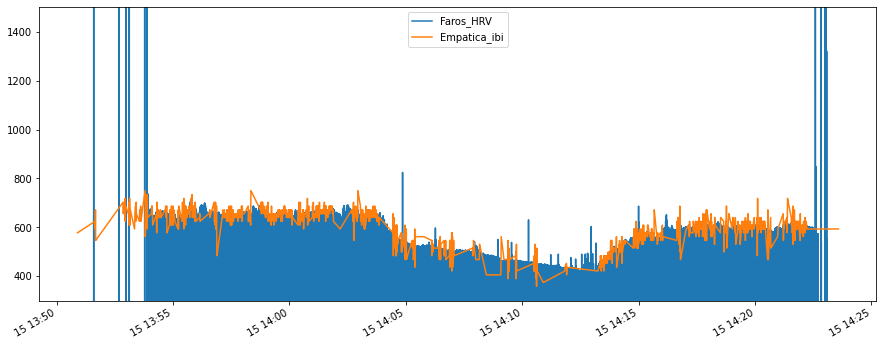

In [34]:
data_ibi = pd.read_csv(r"C:\Users\juank\OneDrive\Desktop\Master_code\Sub1\IBI.csv", index_col=0)
data_ibi.index = pd.to_datetime(data_ibi.index)
data_ibi['Empatica_ibi'] = data_ibi['Empatica_ibi'] * 1000
plot = data_ibi.interpolate(method='time').plot(figsize=(15,6), ylim=(300,1500))
plt.savefig(r"C:\Users\juank\OneDrive\Desktop\Master_code\Sub1\farosvsempatica.pdf")

In [31]:
df1.head() #Check the head of the data

,date_time,faros_ibi,empatica_ibi
0,2019-06-15 13:50:53.848913265,NaN,0.578151
1,2019-06-15 13:51:03.000000000,0.0,NaN
2,2019-06-15 13:51:03.200000000,0.0,NaN
3,2019-06-15 13:51:03.400000000,0.0,NaN
4,2019-06-15 13:51:03.600000000,0.0,NaN


In [32]:
df1["date_time"]= pd.to_datetime(df1['date_time']) # transform the time into data time.

In [33]:
df1.dtypes #check the types of the data, proff time is a correct type

date_time       datetime64[ns]
faros_ibi              float64
empatica_ibi           float64
dtype: object

In [34]:
df1.head() #check the head(content) of the table. It is important to notice that for the different sample rates, 
#it will be highly unlikely to have a signal registered in both of the devices. 

,date_time,faros_ibi,empatica_ibi
0,2019-06-15 13:50:53.848913265,NaN,0.578151
1,2019-06-15 13:51:03.000000000,0.0,NaN
2,2019-06-15 13:51:03.200000000,0.0,NaN
3,2019-06-15 13:51:03.400000000,0.0,NaN
4,2019-06-15 13:51:03.600000000,0.0,NaN


<AxesSubplot:>

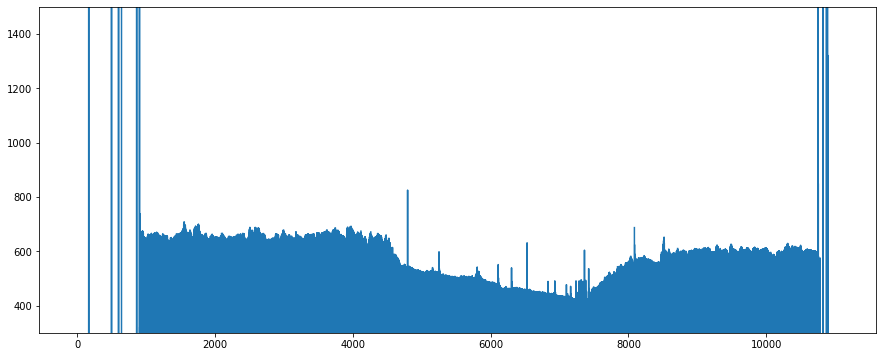

In [35]:
df1["faros_ibi"].plot(figsize=(15,6), ylim=(300,1500)) #plot the RR from faros

<AxesSubplot:>

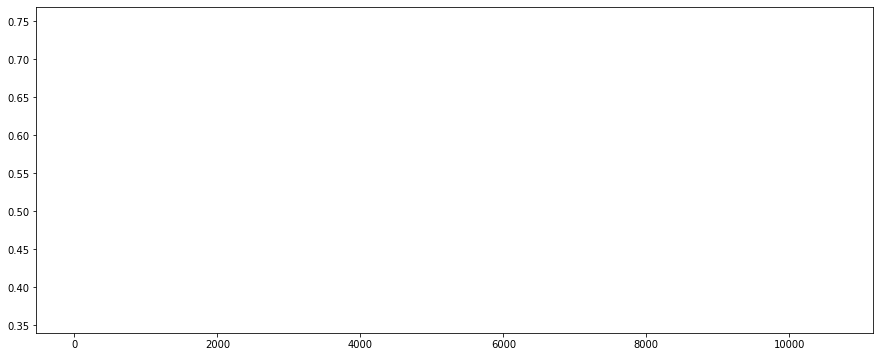

In [36]:
df1["empatica_ibi"].plot(figsize=(15,6)) #plot the RR from empatica. (Not working)?

**Create a subset for FAROS**

In [37]:
df1_1 = df1.loc[df1["faros_ibi"].isnull() != True] #save in a new DF a subset where all the NaN in Faros are droped.

In [38]:
df1_1.head() #check the data

,date_time,faros_ibi,empatica_ibi
1,2019-06-15 13:51:03.000,0.0,NaN
2,2019-06-15 13:51:03.200,0.0,NaN
3,2019-06-15 13:51:03.400,0.0,NaN
4,2019-06-15 13:51:03.600,0.0,NaN
5,2019-06-15 13:51:03.800,0.0,NaN


In [39]:
df1_1 = df1_1.drop(columns = ["empatica_ibi"]) # drop the column of Empatica from our subset

In [40]:
df1_1 = df1_1.drop(df1_1[df1_1.faros_ibi == 0.0].index) #drop the values of RR = 0 (an interval between to subsequents RR can not be 0)

In [41]:
df1_1.head() #check the head of the file

,date_time,faros_ibi
164,2019-06-15 13:51:35.600,18201.0
495,2019-06-15 13:52:41.000,65535.0
597,2019-06-15 13:52:59.200,18085.0
641,2019-06-15 13:53:07.200,7993.0
860,2019-06-15 13:53:47.000,39992.0


In [42]:
df1_1.dtypes #check the datatypes

date_time    datetime64[ns]
faros_ibi           float64
dtype: object

In [43]:
#save the Faros subset into a new file
df1_1.to_csv(r'C:\Users\juank\OneDrive\Desktop\Master_code\Sub1\RR_faros.csv', date_format = "%Y-%m-%d %H:%M:%S.%f", index=False) 

***Corrected Faros subset FIRST REST***

In [44]:
#read and store the saved file
dfsub1_1 = pd.read_csv(r'C:\Users\juank\OneDrive\Desktop\Master_code\Sub1\RR_faros.csv')

In [45]:
#set the date/time as index
dfsub1_1 = dfsub1_1.set_index(pd.DatetimeIndex(dfsub1_1['date_time']))

In [46]:
#use the date/time index to filter the data to our threshold
dfsub1_1 = dfsub1_1.between_time("13:53:54","14:16:30")

In [47]:
#save the filtered subset into a new file
dfsub1_1.to_csv(r'C:\Users\juank\OneDrive\Desktop\Master_code\Sub1\Sub1_RR_faros_fit.csv', index=False) 

**Create a subset for EMPATICA**

In [48]:
df1_2 = df1.loc[df1["empatica_ibi"].isnull() != True] #save in a new DF a subset where all the NaN in Empatica are droped.

In [49]:
df1_2.head() #check the data

,date_time,faros_ibi,empatica_ibi
0,2019-06-15 13:50:53.848913265,NaN,0.578151
181,2019-06-15 13:51:38.909938386,NaN,0.625029
185,2019-06-15 13:51:39.503668771,NaN,0.593777
189,2019-06-15 13:51:40.175522021,NaN,0.671906
193,2019-06-15 13:51:40.722379086,NaN,0.546900


In [50]:
df1_2 = df1_2.drop(columns = ["faros_ibi"]) # drop the column of Faros from our subset

In [51]:
df1_2 = df1_2.drop(df1_2[df1_2.empatica_ibi == 0.0].index) #drop the values of RR = 0 (an interval between to subsequents RR can not be 0)

In [52]:
df1_2.head() #check the head of the file

,date_time,empatica_ibi
0,2019-06-15 13:50:53.848913265,0.578151
181,2019-06-15 13:51:38.909938386,0.625029
185,2019-06-15 13:51:39.503668771,0.593777
189,2019-06-15 13:51:40.175522021,0.671906
193,2019-06-15 13:51:40.722379086,0.546900


In [53]:
df1_2.dtypes #check the datatypes

date_time       datetime64[ns]
empatica_ibi           float64
dtype: object

In [54]:
#save the Faros subset into a new file
df1_2.to_csv(r'C:\Users\juank\OneDrive\Desktop\Master_code\Sub1\RR_empatica.csv', date_format = "%Y-%m-%d %H:%M:%S.%f", index=False) 

***Corrected Empatica subset***

In [55]:
#read and store the saved file
dfsub1_2 = pd.read_csv(r'C:\Users\juank\OneDrive\Desktop\Master_code\Sub1\RR_empatica.csv')

In [56]:
#set the date/time as index
dfsub1_2 = dfsub1_2.set_index(pd.DatetimeIndex(dfsub1_2['date_time']))

In [57]:
#use the date/time index to filter the data to our threshold
dfsub1_2 = dfsub1_2.between_time("13:53:54","14:16:30")

In [58]:
#match the difference of scale
dfsub1_2["empatica_ibi"] = dfsub1_2["empatica_ibi"]*1000

In [59]:
#save the filtered subset into a new file
dfsub1_2.to_csv(r'C:\Users\juank\OneDrive\Desktop\Master_code\Sub1\Sub1_RR_empatica_fit.csv', index=False) 